In [19]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 60)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline

# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

dfTrain = pd.read_csv('covtype_train_data.csv', index_col='Id')

dfTrain.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah_Wilderness_Area',
       'Neota_Wilderness_Area', 'Comanche_Peak_Wilderness_Area',
       'Cache_La_Poudre_Wilderness_Area', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soi

In [20]:
#Check to see distribution of cover type within the training subset
dfTrain['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

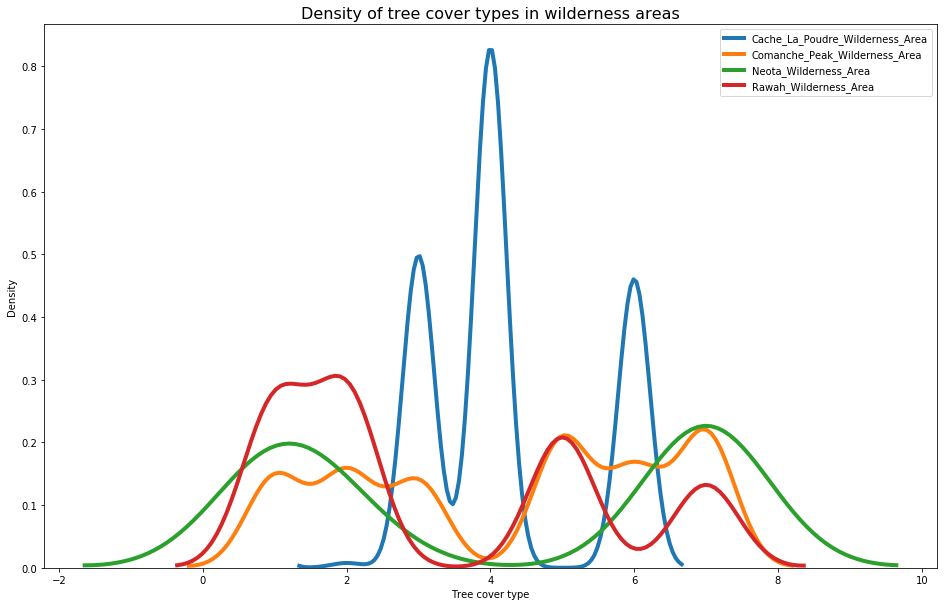

In [21]:
#Create a column for Wilderness area type
dfTrain['Wilderness_Area_Type'] = (dfTrain.iloc[:, 10:14] == 1).idxmax(1)

#Create a list of the wilderness areas
wilderness_areas = sorted(dfTrain['Wilderness_Area_Type'].value_counts().index.tolist())

#Setting the size of the KDE
figsize(16,10)

#Loop through the wilderness areas and plot them with density of the column cover type
for area in wilderness_areas:
    subset = dfTrain[dfTrain['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=4)

#Setting the title and axis labels
plt.ylabel("Density")
plt.xlabel("Tree cover type")
plt.title("Density of tree cover types in wilderness areas", size=16)

#Set y to the Cover type column of the training subset for the TTS function
y=dfTrain['Cover_Type']

In [22]:
#KDE Plot showcases the importance of elevation for cover type and species density as the wilderness area with the lowest
#mean elevation has the highest density of cover type of the four wilderness areas. Likely due to effective oxygen levels 
#which lower by 1% or more every 1,000ft of elevation.

(11.0, 0.0)

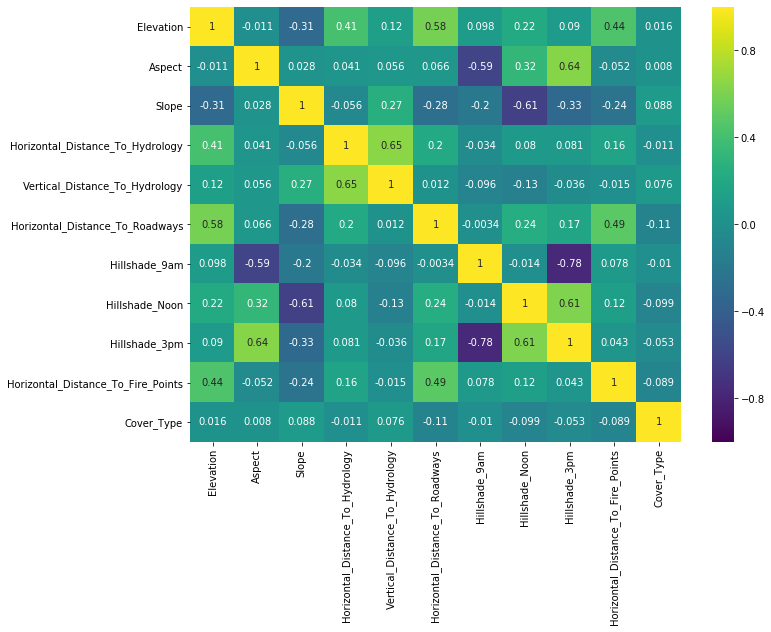

In [23]:
#Creating a correlation heatmap (or matrix) in order to find correlation between our cartographic variables and our 
#intended outcome variable of cover type. 
size = 10
corrmat = dfTrain[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type']].corr()
f, ax = plt.subplots(figsize = (11,8))
matrix = sns.heatmap(corrmat,vmax=1, vmin =-1, annot=True, center = 0,
            cmap = 'viridis');
bottom, top = matrix.get_ylim()
matrix.set_ylim(bottom + 0.5, top - 0.5)

In [24]:
#Heatmap shows elevation is linearly related to cover type, along with aspect and slope. Also it is important to note
#that all hillshade variables are similar in their relationship with cover type. 